In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf

In [3]:
print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 2.0.0


In [4]:
tf.test.is_gpu_available()

False

In [5]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
train_images = np.expand_dims(train_images, -1) 
#之前是将图片扁平化，变为一维数组
#这里需要扩张维度，使其变为四维（图片个数、图片高度、图片宽度和图片的channal：None，hight，witch,chanal）

In [13]:
train_images.shape #(60000, 28, 28, 1) channal为1是黑白图片 彩色是3

(60000, 28, 28, 1)

In [14]:
test_images = np.expand_dims(test_images, -1) 

In [15]:
test_images.shape

(10000, 28, 28, 1)

In [16]:
model = tf.keras.Sequential() #顺序模型
model.add(tf.keras.layers.Conv2D(32, (3, 3),input_shape = train_images.shape[1:],activation='relu'))
#model.add(tf.keras.layers.Conv2D(32, (3, 3),input_shape = train_images.shape[1:],activation='relu'，padding='same'))
#添加padding='same'参数可使像素与原像素相同，默认是"valid"填充方式会改变像素
#识别图形一般使用卷积层作为第一层 32是卷积核个数 3*3是卷积核大小 一般情况使用3*3和5*5 input_shape中传入除了第0维（个数）的shape
model.add(keras.layers.MaxPool2D()) # 默认参数是2*2，会将图片缩小为原来的一半
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))# 卷积核个数是2的n次方递增的，可以增强拟合能力
model.add(keras.layers.GlobalAveragePooling2D()) # 全局平均值化
model.add(keras.layers.Dense(10, activation='softmax')) #输出层

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', #优化函数
             loss='sparse_categorical_crossentropy',
             metrics=['acc'] #训练过程中输出正确率
             )

In [19]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 28s 467us/sample - loss: 0.7211 - acc: 0.7603 - val_loss: 0.5713 - val_acc: 0.8066
Epoch 2/30
60000/60000 [==============================] - 25s 410us/sample - loss: 0.4708 - acc: 0.8362 - val_loss: 0.4406 - val_acc: 0.8491
Epoch 3/30
60000/60000 [==============================] - 29s 481us/sample - loss: 0.4147 - acc: 0.8547 - val_loss: 0.4028 - val_acc: 0.8578
Epoch 4/30
60000/60000 [==============================] - 29s 491us/sample - loss: 0.3826 - acc: 0.8639 - val_loss: 0.4379 - val_acc: 0.8437
Epoch 5/30
60000/60000 [==============================] - 29s 476us/sample - loss: 0.3593 - acc: 0.8719 - val_loss: 0.3678 - val_acc: 0.8704
Epoch 6/30
60000/60000 [==============================] - 29s 481us/sample - loss: 0.3401 - acc: 0.8786 - val_loss: 0.4054 - val_acc: 0.8575
Epoch 7/30
60000/60000 [==============================] - 29s 476us/sample - loss: 0.3227 - acc: 0.8854 

In [20]:
history.history.keys() #看一下有哪些参数

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

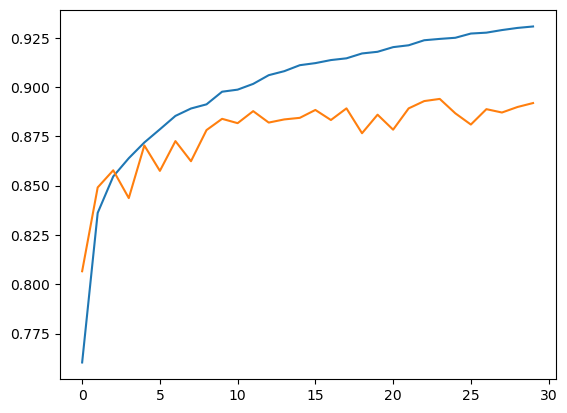

In [21]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc') 
#由图得知过拟合
# train数据正确率没有100%，有待提高，说明对train数据拟合不够：增加隐藏层个数 单元数
# test数据与train数据有差距，说明test数据过拟合：添加dropout层

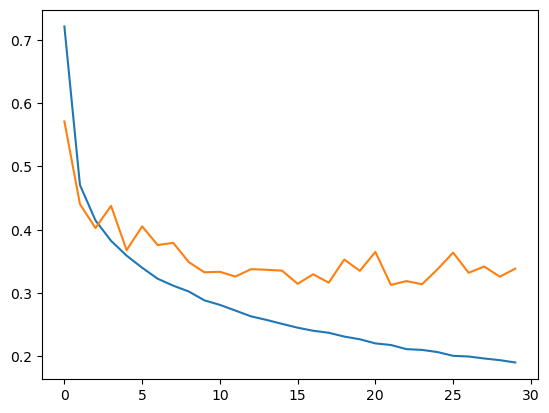

In [22]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')


In [23]:
# 修改：增加第一层卷积层个数2的n次方；多重复添加Conv2D层与MaxPool2D层；倒数第二层添加Dens层（注意激活函数是relu，因为此层不是输出层）
#修改后会导致过拟合严重，所有添加dropout层：在MaxPool2D层与Conv2D层后添加
model = tf.keras.Sequential() #顺序模型
model.add(tf.keras.layers.Conv2D(64, (3, 3),input_shape = train_images.shape[1:],activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D()) # 默认参数是2*2，会将图片缩小为原来的一半
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'))# 卷积核个数是2的n次方递增的，可以增强拟合能力
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GlobalAveragePooling2D()) # 全局平均值化
model.add(keras.layers.Dense(256, activation='relu')) 
model.add(keras.layers.Dense(10, activation='softmax')) #输出层

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)        

In [25]:
model.compile(optimizer='adam', #优化函数
             loss='sparse_categorical_crossentropy',
             metrics=['acc'] #训练过程中输出正确率
             )

In [26]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 582s 10ms/sample - loss: 0.8059 - acc: 0.7010 - val_loss: 0.4241 - val_acc: 0.8403
Epoch 2/30
27392/60000 [============>.................] - ETA: 4:52 - loss: 0.4734 - acc: 0.8277

KeyboardInterrupt: 

In [ ]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc') 

In [ ]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
